In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler

#maybe scale the data #standard scaler

#remove houses above 40,000 sqft

#stratify=y
# ss = StandardScaler()
# ss.fit(X_train)
# X_scaled_train = ss.transform(X_train)
# X_scaled_holdout = ss.transform(X_holdout)


In [4]:
ames_data = pd.read_csv("train.csv")

In [5]:
ames_data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Id,109,544,153,318,255,138,2827,145,1942,1956,1044,2752,807,1177,1480
PID,533352170,531379050,535304180,916386060,906425045,535126040,908186070,535154050,535353130,535426130,527451290,906380150,906226060,533236070,907418040
MS SubClass,60,60,20,60,50,20,180,20,20,60,160,20,70,160,20
MS Zoning,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL,RM,RL,RL,FV,RL
Lot Frontage,NaN,43,68,73,82,137,35,NaN,NaN,70,21,64,120,24,74
Lot Area,13517,11492,7922,9802,14235,16492,3675,12160,15783,11606,1680,7488,26400,2645,9627
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pave,NaN
Lot Shape,IR1,IR1,Reg,Reg,IR1,IR1,Reg,IR1,Reg,IR1,Reg,IR1,Reg,Reg,Reg
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,HLS,Lvl,Lvl,Bnk,Lvl,Lvl


In [6]:
ames_data.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [7]:
ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [8]:
ames_data.columns = ames_data.columns.map(lambda x: str(x.replace(' ', '_')))

In [9]:
ames_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS_SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot_Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot_Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall_Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall_Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year_Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year_Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas_Vnr_Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [10]:
ames_data.isnull().sum()

Id                   0
PID                  0
MS_SubClass          0
MS_Zoning            0
Lot_Frontage       330
Lot_Area             0
Street               0
Alley             1911
Lot_Shape            0
Land_Contour         0
Utilities            0
Lot_Config           0
Land_Slope           0
Neighborhood         0
Condition_1          0
Condition_2          0
Bldg_Type            0
House_Style          0
Overall_Qual         0
Overall_Cond         0
Year_Built           0
Year_Remod/Add       0
Roof_Style           0
Roof_Matl            0
Exterior_1st         0
Exterior_2nd         0
Mas_Vnr_Type        22
Mas_Vnr_Area        22
Exter_Qual           0
Exter_Cond           0
                  ... 
Bedroom_AbvGr        0
Kitchen_AbvGr        0
Kitchen_Qual         0
TotRms_AbvGrd        0
Functional           0
Fireplaces           0
Fireplace_Qu      1000
Garage_Type        113
Garage_Yr_Blt      114
Garage_Finish      114
Garage_Cars          1
Garage_Area          1
Garage_Qual

In [11]:
ames_data['Alley'].unique() #better to use value counts.

array([nan, 'Pave', 'Grvl'], dtype=object)

In [12]:
ames_data['Alley'].value_counts() #might be best to one hot encode alley, 1 for alley, 0 not 

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [13]:
ames_data["Pool_QC"].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [14]:
ames_data['Pool_QC'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: Pool_QC, dtype: int64

In [15]:
ames_data['Pool_Area'].value_counts()

0      2042
561       1
519       1
800       1
738       1
648       1
576       1
480       1
368       1
228       1
Name: Pool_Area, dtype: int64

In [16]:
ames_data['Fireplace_Qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [17]:
ames_data["Fireplace_Qu"].value_counts()

Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: Fireplace_Qu, dtype: int64

In [18]:
ames_data['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [19]:
ames_data['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [20]:
ames_data['Misc_Feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [21]:
ames_data['Misc_Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc_Feature, dtype: int64

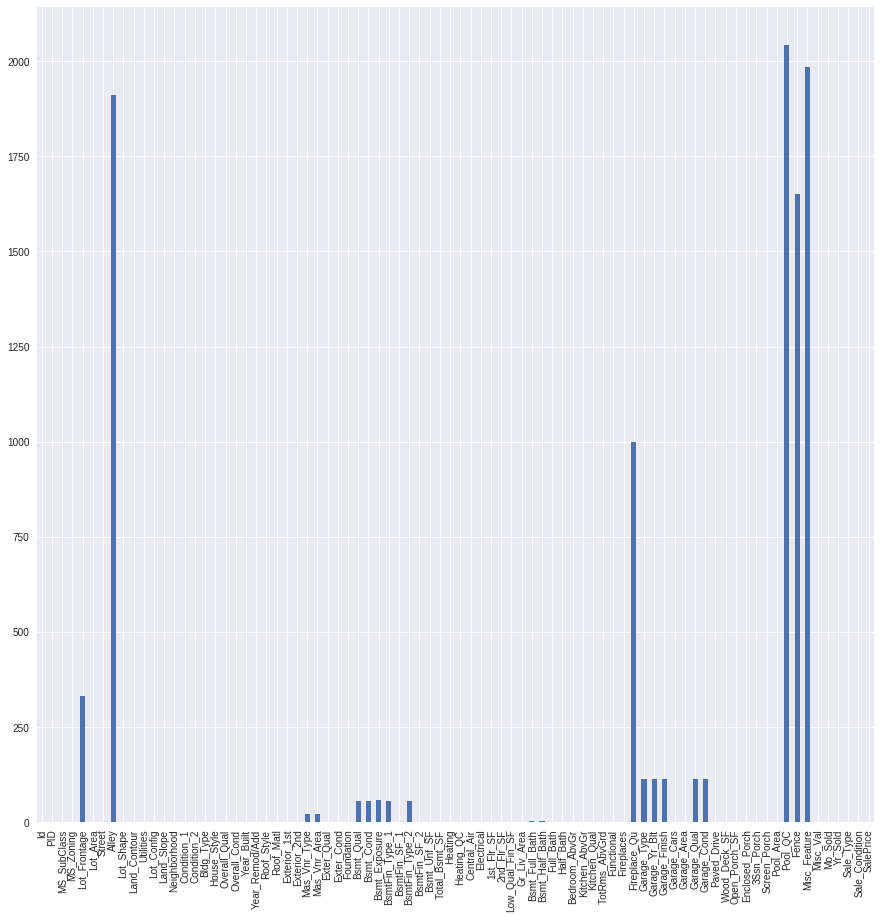

In [22]:
missing_data = ames_data.isnull().sum()

fig, ax = plt.subplots(figsize=(15,15))
missing_data.plot(kind = 'bar')

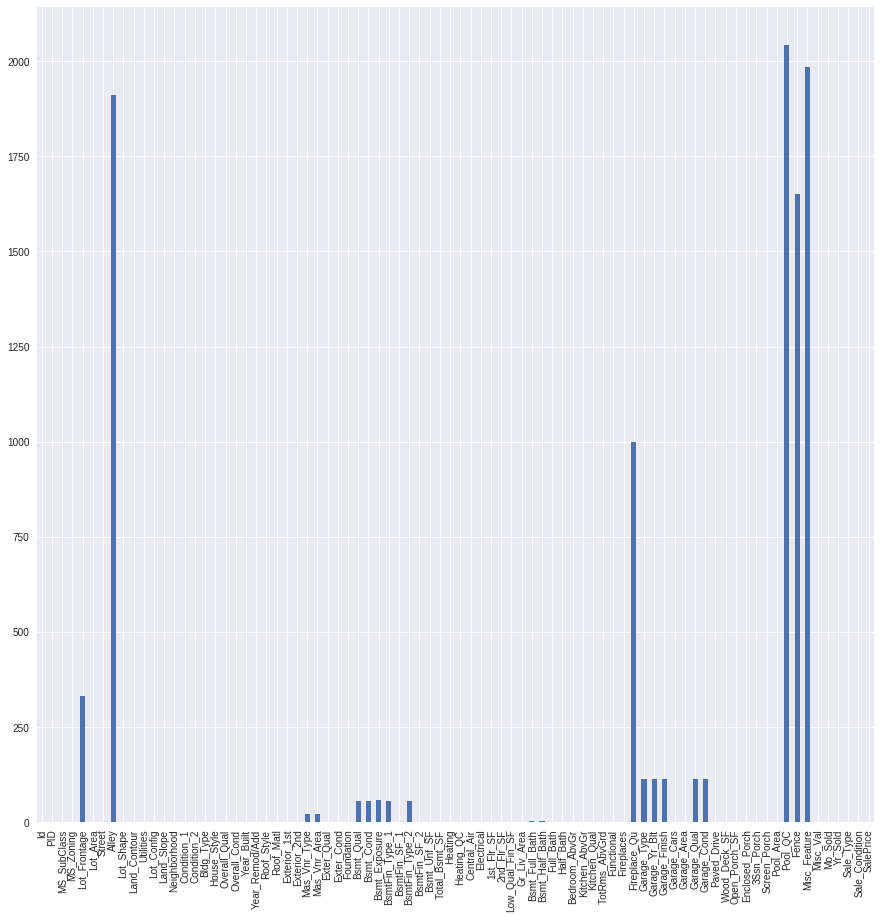

In [23]:
fig, ax = plt.subplots(figsize=(15,15))
missing_data.plot(kind = 'bar')

Columns to remove: Alley, Fireplace_QC, Pool_QC, Fence, Misc_Feature


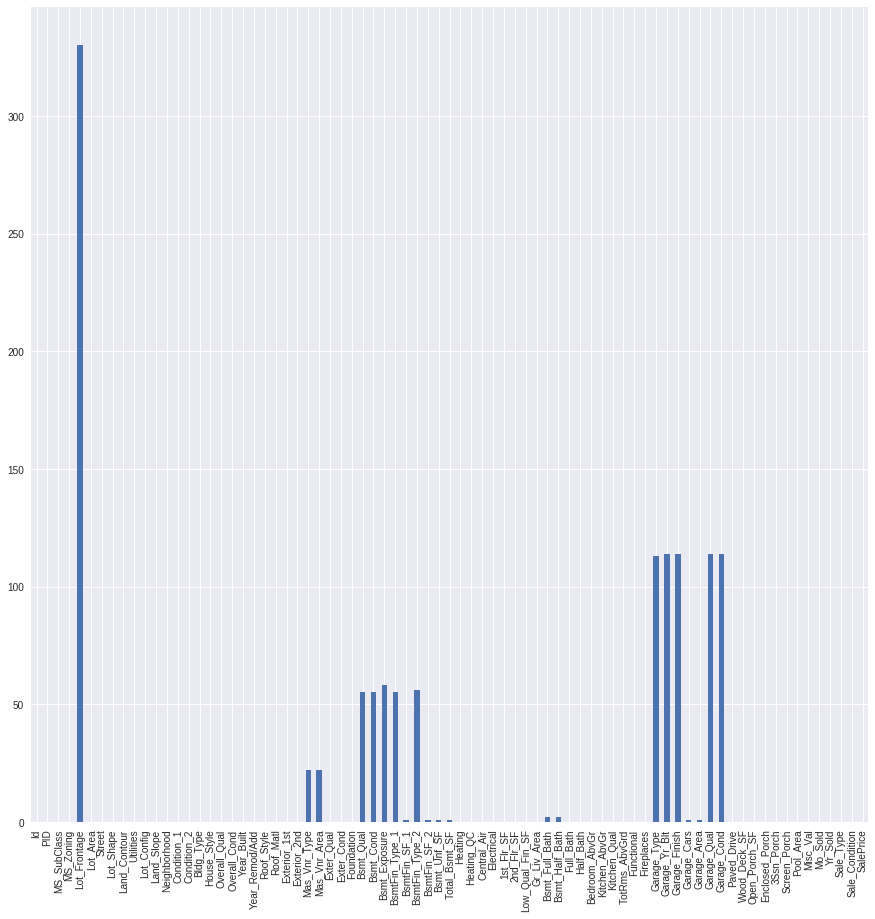

In [24]:
ames_data = ames_data.drop(["Alley",'Fireplace_Qu','Pool_QC','Fence', 'Misc_Feature'], axis = 1)

missing_data = ames_data.isnull().sum()

fig, ax = plt.subplots(figsize=(15,15))
missing_data.plot(kind = 'bar')

There are a couple really large houeses in the DataFrame, mostly Ag and Industrial, since we are wanting OORE we should remove them from the set. 


In [25]:
sorted_zonging = ames_data.sort_values('MS_Zoning', axis = 0, ascending=True)

In [26]:
ames_data = ames_data.fillna(np.nan)

In [27]:
ames_data.isnull().sum()

Id                  0
PID                 0
MS_SubClass         0
MS_Zoning           0
Lot_Frontage      330
Lot_Area            0
Street              0
Lot_Shape           0
Land_Contour        0
Utilities           0
Lot_Config          0
Land_Slope          0
Neighborhood        0
Condition_1         0
Condition_2         0
Bldg_Type           0
House_Style         0
Overall_Qual        0
Overall_Cond        0
Year_Built          0
Year_Remod/Add      0
Roof_Style          0
Roof_Matl           0
Exterior_1st        0
Exterior_2nd        0
Mas_Vnr_Type       22
Mas_Vnr_Area       22
Exter_Qual          0
Exter_Cond          0
Foundation          0
                 ... 
Bsmt_Full_Bath      2
Bsmt_Half_Bath      2
Full_Bath           0
Half_Bath           0
Bedroom_AbvGr       0
Kitchen_AbvGr       0
Kitchen_Qual        0
TotRms_AbvGrd       0
Functional          0
Fireplaces          0
Garage_Type       113
Garage_Yr_Blt     114
Garage_Finish     114
Garage_Cars         1
Garage_Are

Find the remaining null value columns after we have removed all the large offenders. 

Still need to convert some of the categorical columns to numeric. Create columns for total bath, bed, etc.

In [28]:
null_columns = ames_data.columns[ames_data.isnull().any()]
ames_data[null_columns].isnull().sum()

Lot_Frontage      330
Mas_Vnr_Type       22
Mas_Vnr_Area       22
Bsmt_Qual          55
Bsmt_Cond          55
Bsmt_Exposure      58
BsmtFin_Type_1     55
BsmtFin_SF_1        1
BsmtFin_Type_2     56
BsmtFin_SF_2        1
Bsmt_Unf_SF         1
Total_Bsmt_SF       1
Bsmt_Full_Bath      2
Bsmt_Half_Bath      2
Garage_Type       113
Garage_Yr_Blt     114
Garage_Finish     114
Garage_Cars         1
Garage_Area         1
Garage_Qual       114
Garage_Cond       114
dtype: int64

In [29]:
ames_data = ames_data.dropna(axis = 0, how = 'any')

In [30]:
ames_data.shape

(1556, 77)

Feeling good about missing data, lets now take a look at some of the relationships between Sale Price and some of the variables 

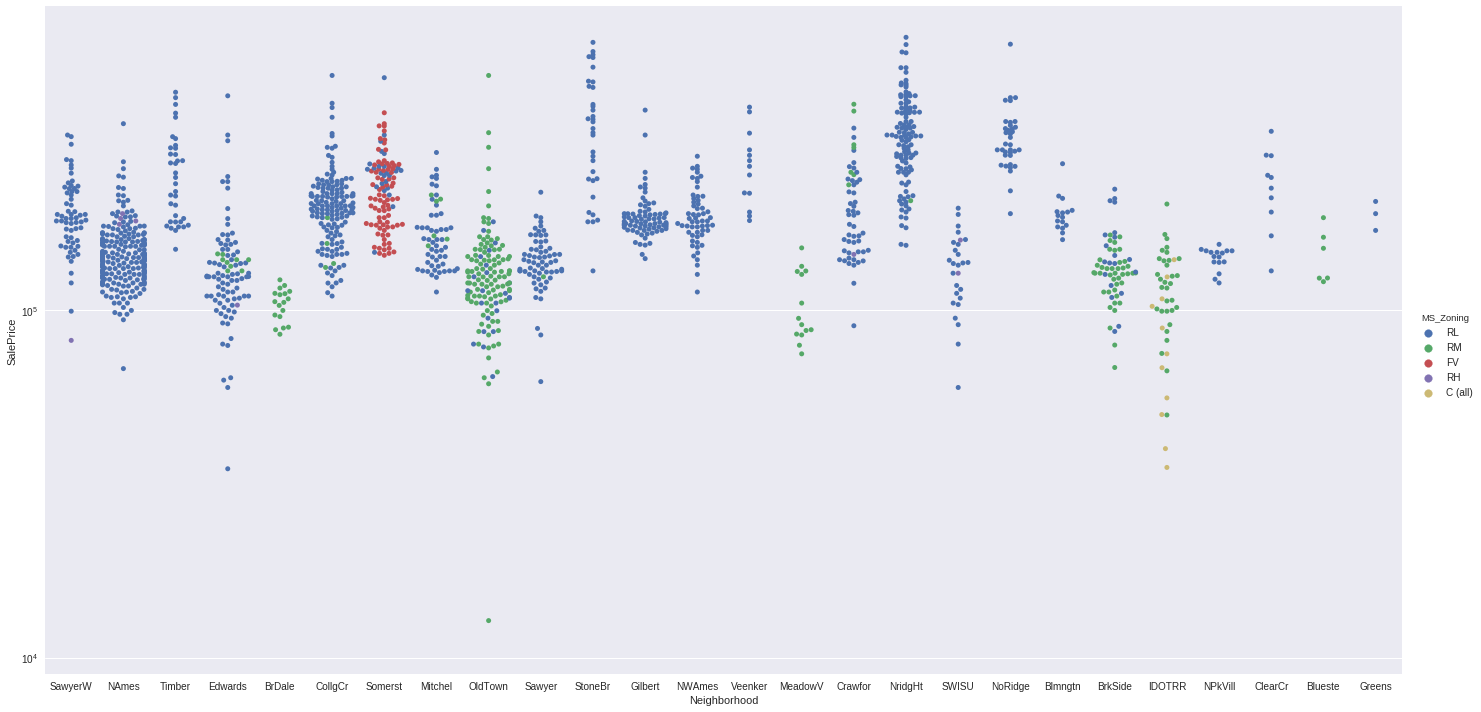

In [31]:
fig = sns.factorplot(x='Neighborhood', y='SalePrice', hue='MS_Zoning', data=ames_data, kind='swarm', size=10, aspect=2)
ax = fig.axes[0][0]
ax.set_yscale('log')
plt.show()

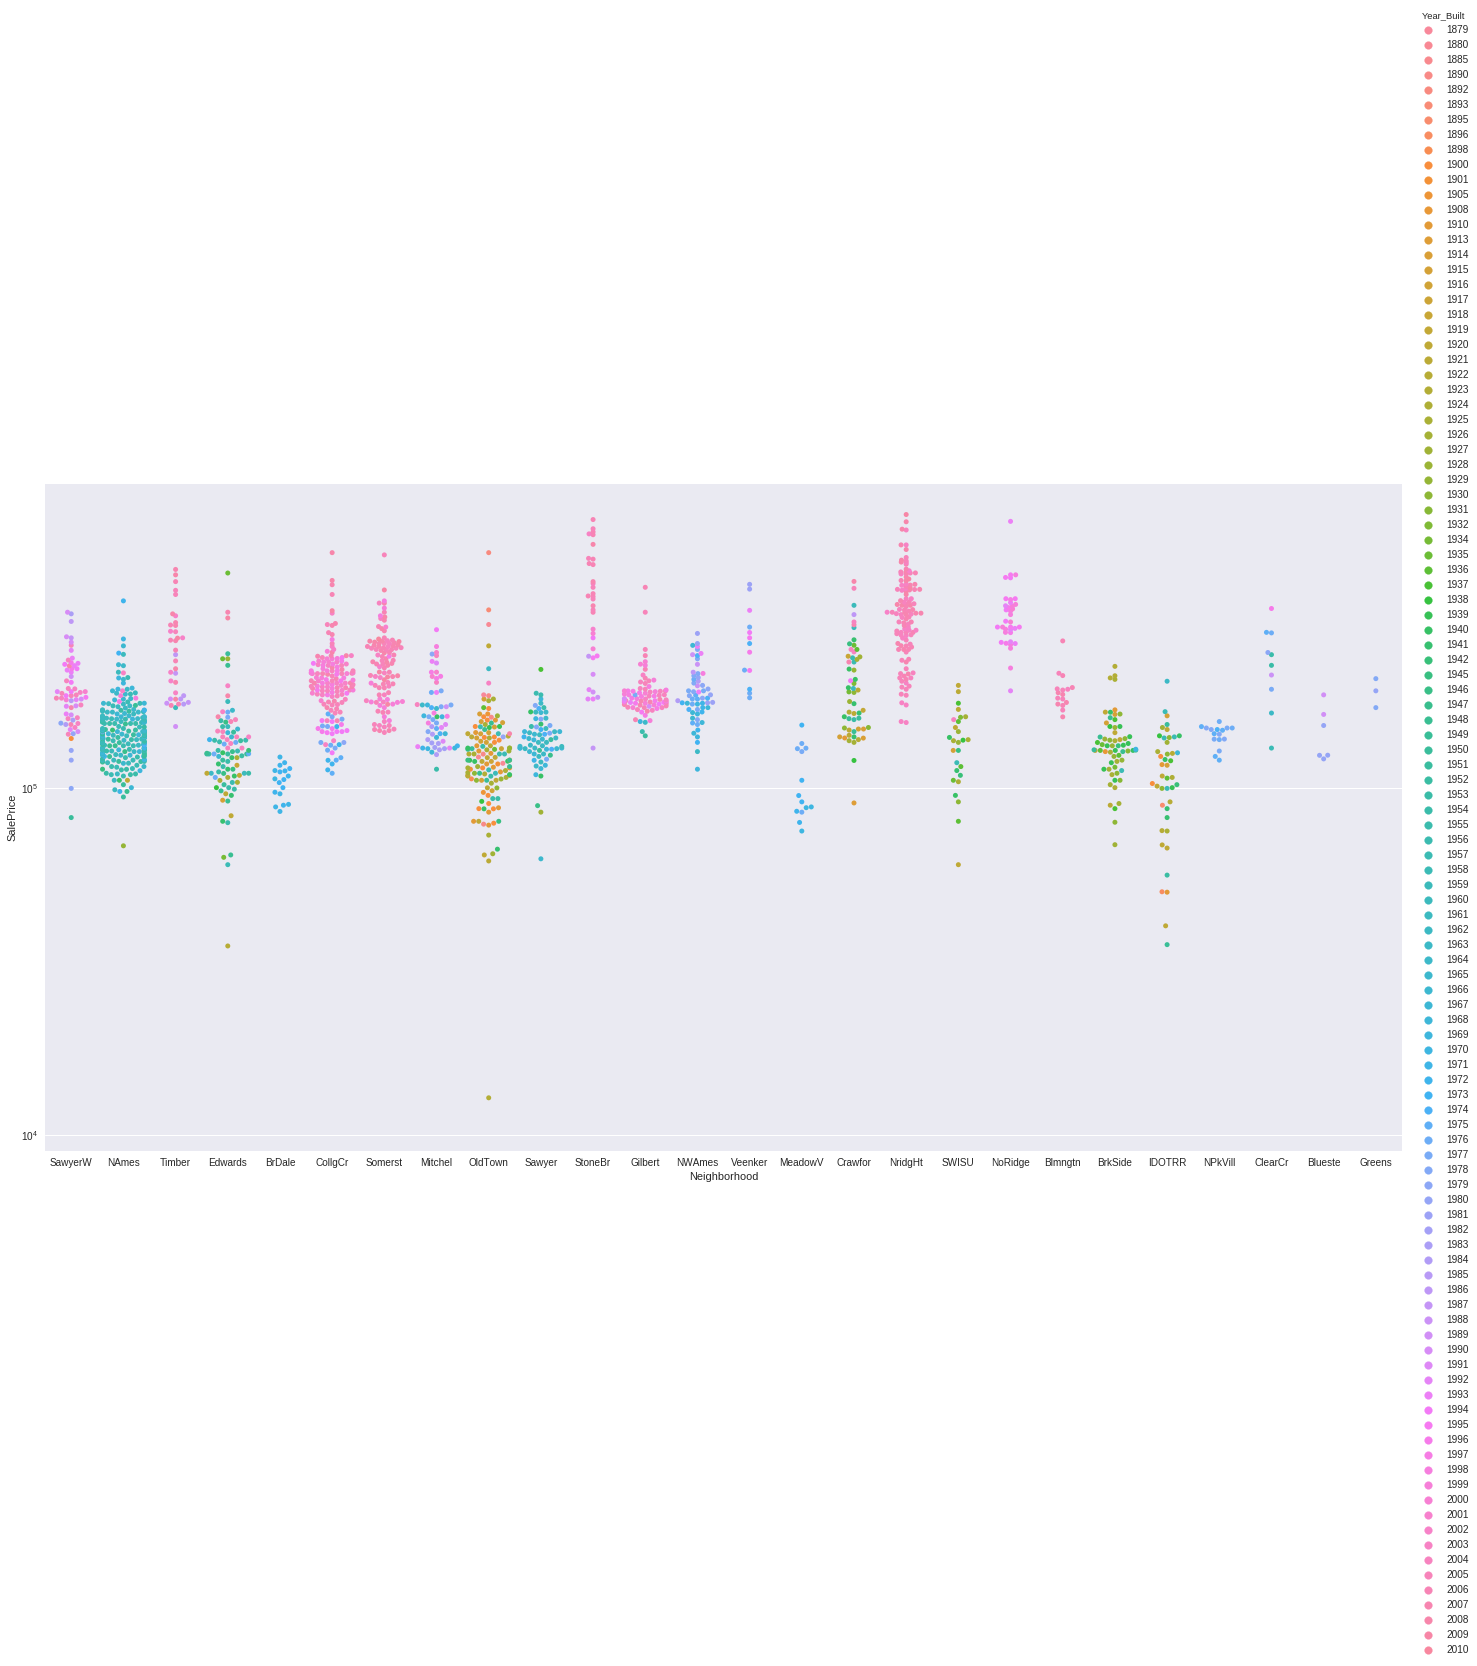

In [32]:
fig = sns.factorplot(x='Neighborhood', y='SalePrice', hue='Year_Built', data=ames_data, kind='swarm', size=10, aspect=2)
ax = fig.axes[0][0]
ax.set_yscale('log')
plt.show()

In [33]:
neighborhood_groups = ames_data.groupby('Neighborhood').Id.count().sort_values()



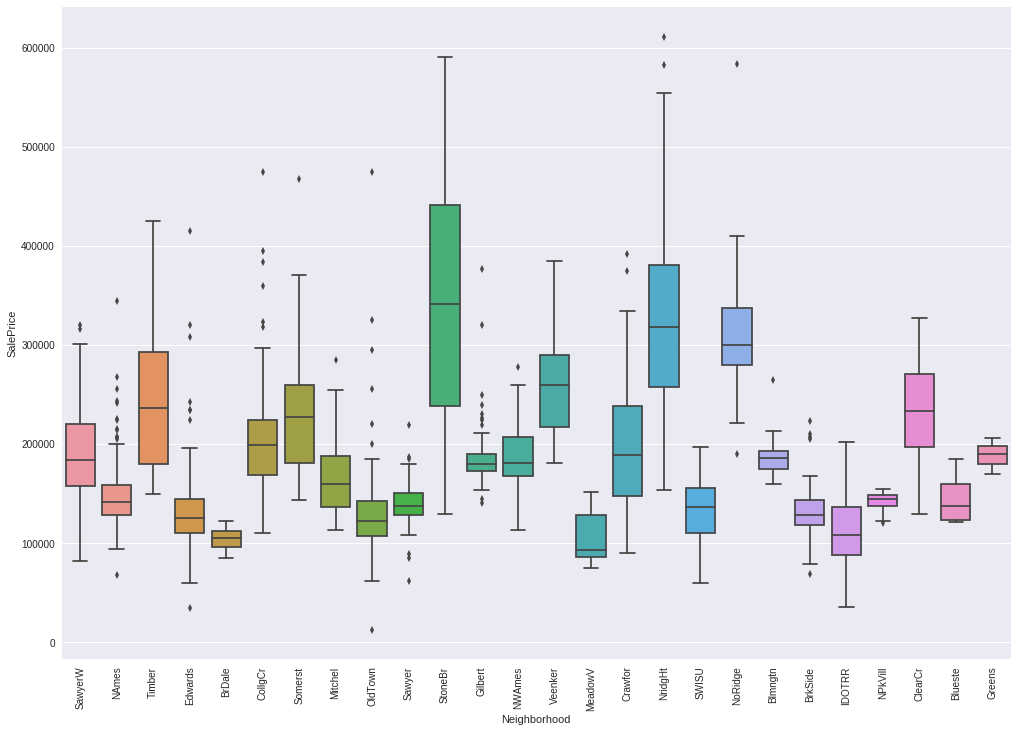

In [34]:
fig, ax = plt.subplots(figsize=(17,12))
sns.boxplot(x = ames_data['Neighborhood'], y = ames_data['SalePrice'])
plt.xticks(rotation=90);

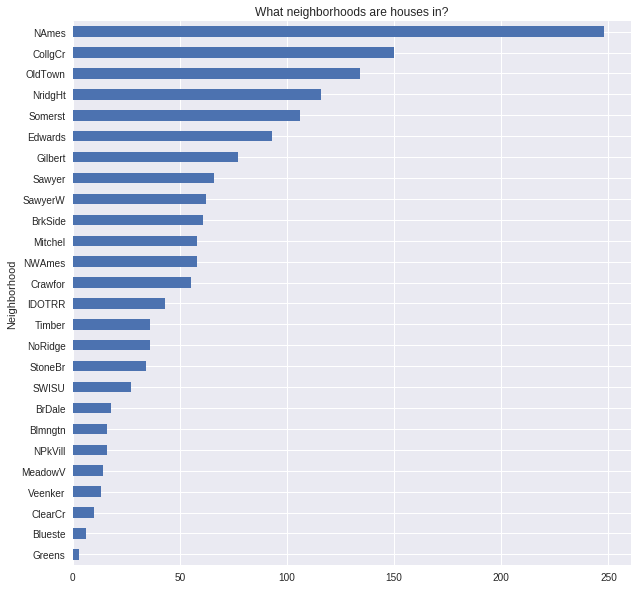

In [35]:
ames_data.groupby('Neighborhood').Id.count().sort_values().plot(kind='barh', figsize=(10,10))
plt.title('What neighborhoods are houses in?')
plt.show()

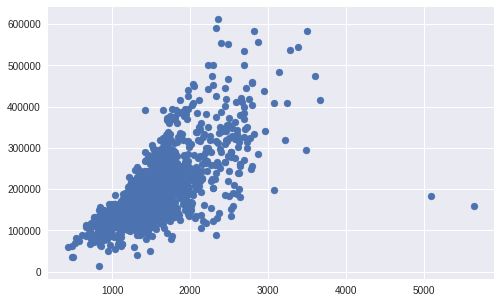

In [36]:
fig, ax = plt.subplots(figsize=(8,5))
living_area = plt.scatter(x = ames_data['Gr_Liv_Area'], y = ames_data["SalePrice"])

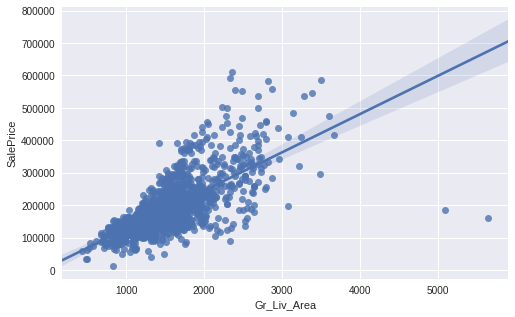

In [37]:
fig, ax = plt.subplots(figsize=(8,5))
living_area = sns.regplot(x = ames_data['Gr_Liv_Area'], y = ames_data["SalePrice"])

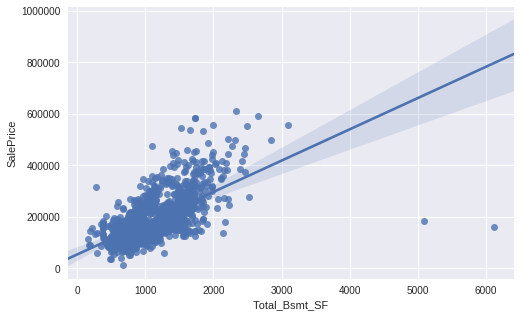

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
basement_sqft = sns.regplot(ames_data['Total_Bsmt_SF'], ames_data["SalePrice"])

In [39]:
ames_data = ames_data.drop(ames_data[(ames_data['Gr_Liv_Area']>4000) & (ames_data['SalePrice']<300000)].index)

We can gather from this that there is a strong correlation between Greater Living Space / Basement Squarefootage and Sale Price.

Lets now look at some categorical values like Overall Condition/ Quality and price.

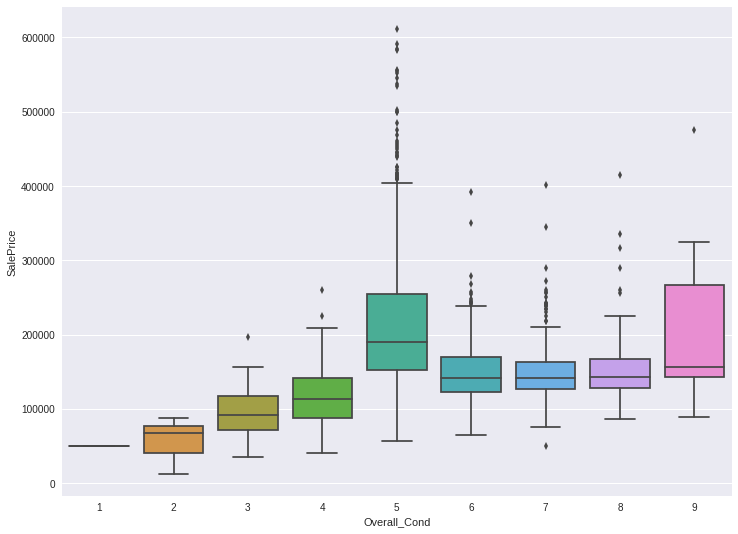

In [40]:

fig, ax = plt.subplots(figsize=(12,9))
overall_condition = sns.boxplot(x=ames_data['Overall_Cond'], y=ames_data['SalePrice'])

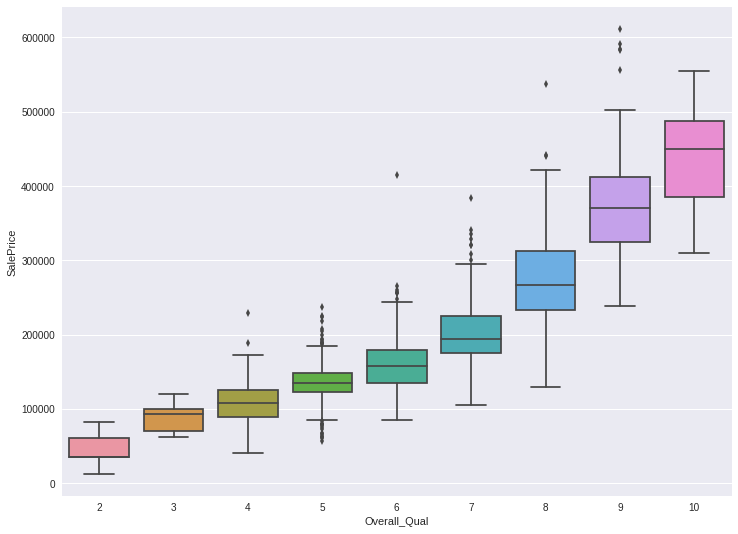

In [41]:
fig, ax = plt.subplots(figsize=(12,9))
overall_quality = sns.boxplot(x=ames_data['Overall_Qual'], y=ames_data['SalePrice'])

From the above graphs it looks like there is a stronger relationship with Quality


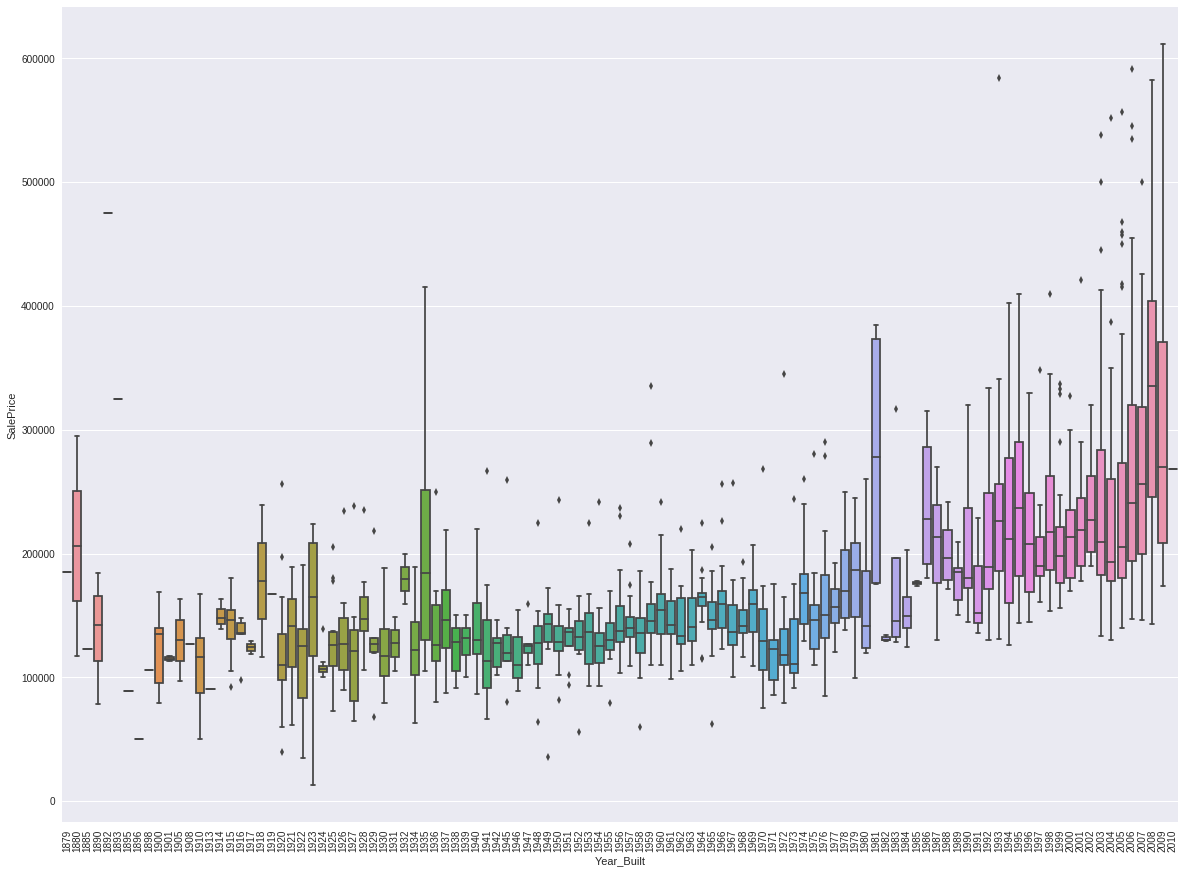

In [42]:
fig, ax = plt.subplots(figsize=(20,15))
year_built = sns.pointplot(x=ames_data['Year_Built'], y=ames_data['SalePrice'], alpha)
year_built_box = sns.boxplot(x=ames_data['Year_Built'], y=ames_data['SalePrice'])
plt.xticks(rotation=90);

Lets take a look at the "Functional" Variable 

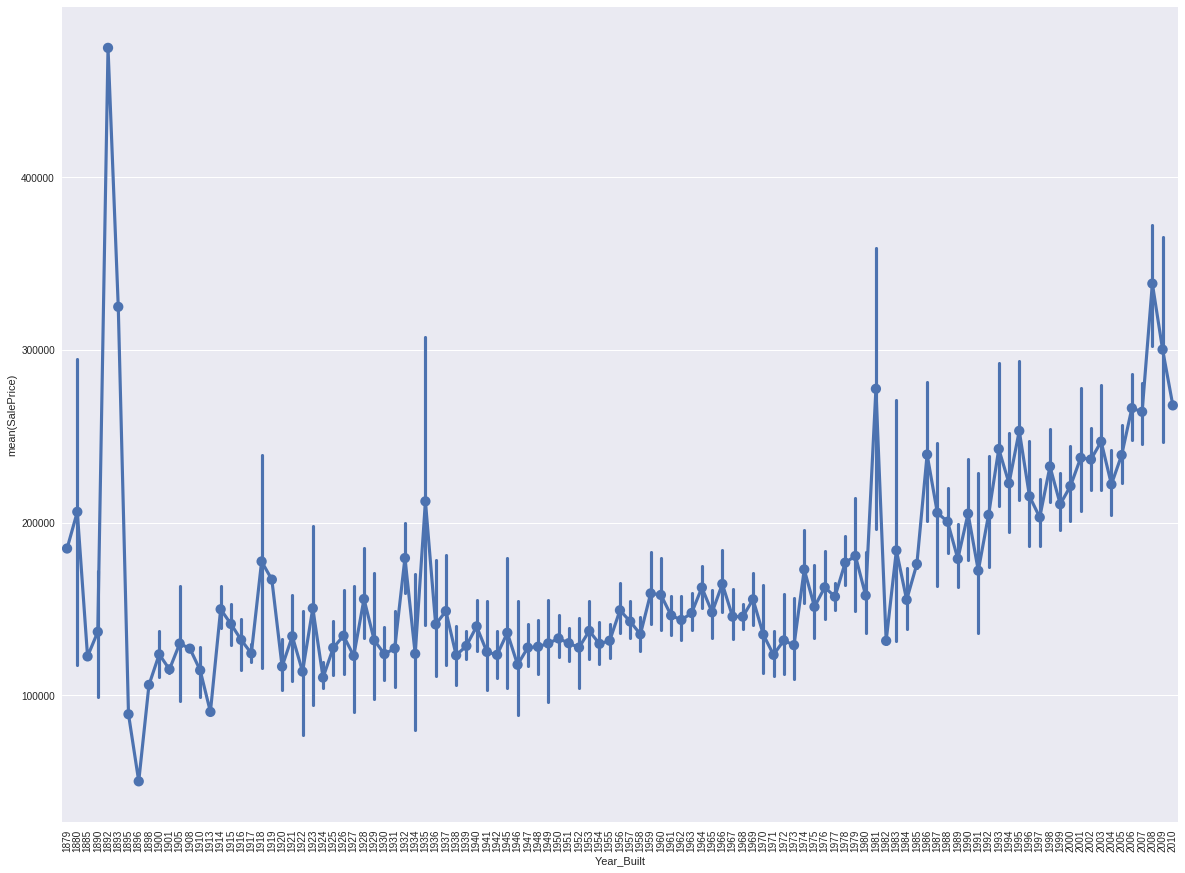

In [43]:
fig, ax = plt.subplots(figsize=(20,15))
year_built = sns.pointplot(x=ames_data['Year_Built'], y=ames_data['SalePrice'])
plt.xticks(rotation=90);

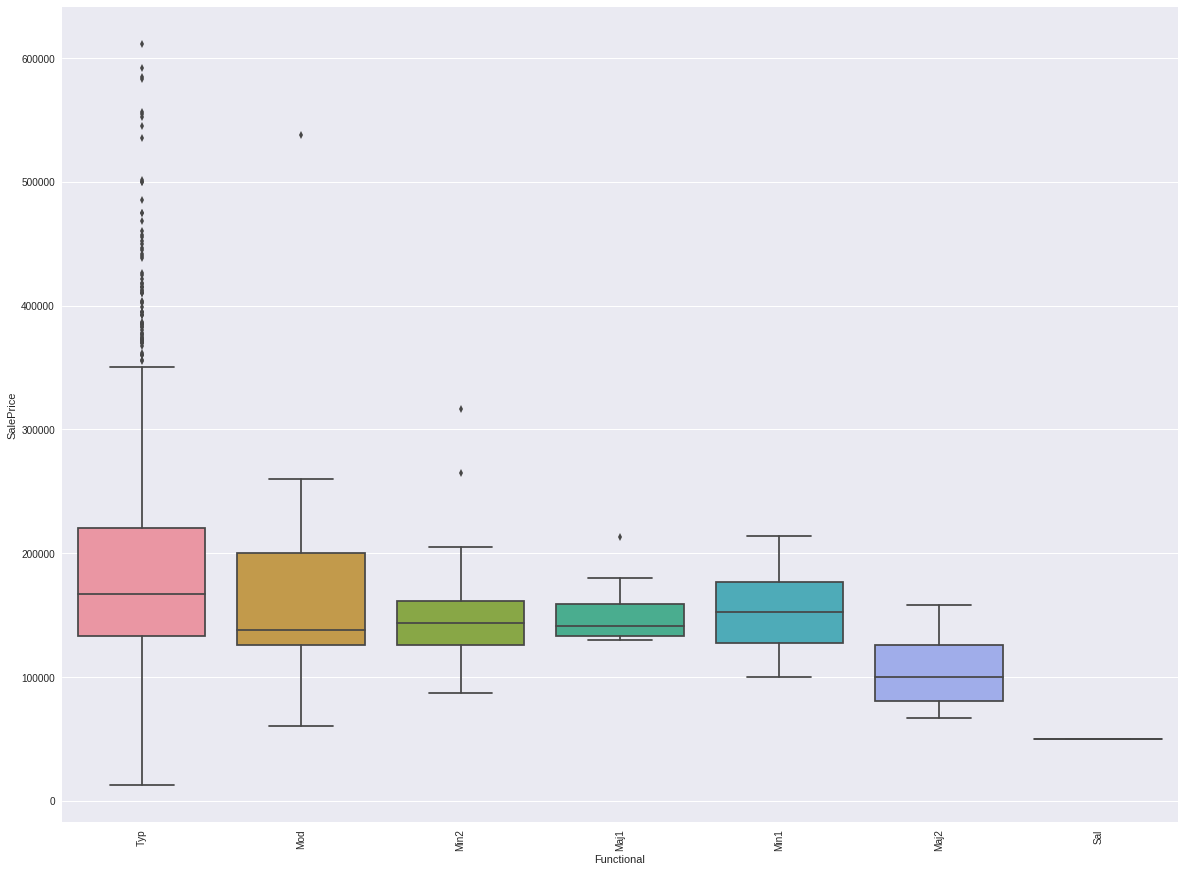

In [44]:
fig, ax = plt.subplots(figsize=(20,15))
functional = sns.boxplot(x=ames_data['Functional'], y=ames_data['SalePrice'])
plt.xticks(rotation=90);

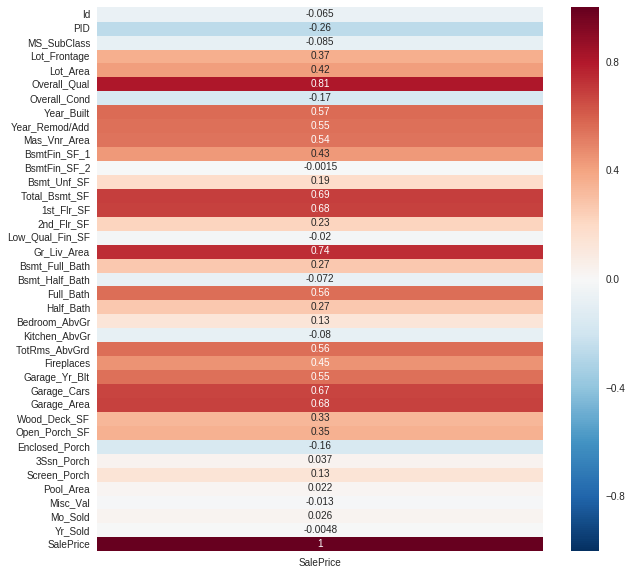

In [45]:

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ames_data.corr()[['SalePrice']], annot=True)

In [46]:
ames_data.corr()['SalePrice'].sort_values(ascending = False)

SalePrice          1.000000
Overall_Qual       0.811357
Gr_Liv_Area        0.740144
Total_Bsmt_SF      0.690534
1st_Flr_SF         0.682760
Garage_Area        0.680822
Garage_Cars        0.673658
Year_Built         0.567814
Full_Bath          0.561000
TotRms_AbvGrd      0.556162
Garage_Yr_Blt      0.550849
Year_Remod/Add     0.547735
Mas_Vnr_Area       0.543644
Fireplaces         0.448381
BsmtFin_SF_1       0.432725
Lot_Area           0.419349
Lot_Frontage       0.366476
Open_Porch_SF      0.353138
Wood_Deck_SF       0.330126
Bsmt_Full_Bath     0.270269
Half_Bath          0.266132
2nd_Flr_SF         0.226268
Bsmt_Unf_SF        0.187087
Screen_Porch       0.133182
Bedroom_AbvGr      0.128644
3Ssn_Porch         0.036766
Mo_Sold            0.026109
Pool_Area          0.022080
BsmtFin_SF_2      -0.001500
Yr_Sold           -0.004801
Misc_Val          -0.013041
Low_Qual_Fin_SF   -0.020394
Id                -0.064571
Bsmt_Half_Bath    -0.072255
Kitchen_AbvGr     -0.080145
MS_SubClass       -0

Okay we feel good about the relationship between some of the variables but now its time to modify some of the columns. We need to change some of the categorical values (Good, Bad, Average etc) to a numerical number so we can add it to the regression. 


In [47]:
ames_data.Exter_Qual.replace({'TA': 3, 'Gd': 4, 'Ex': 5, 'Fa': 2}, inplace=True)

In [48]:
ames_data.Exter_Qual.dtype

dtype('int64')

In [49]:
ames_data.Exter_Cond.replace({'TA': 3, 'Gd': 4, 'Ex': 5, 'Fa': 2}, inplace=True)

In [50]:
ames_data.Exter_Cond.dtype

dtype('int64')

In [51]:
ames_data.Bsmt_Qual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace=True)
ames_data.Bsmt_Qual.value_counts()

3    685
4    661
5    157
2     50
1      1
Name: Bsmt_Qual, dtype: int64

In [52]:
ames_data.Bsmt_Cond.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace=True)
ames_data.Bsmt_Cond.value_counts()

3    1428
4      72
2      49
5       3
1       2
Name: Bsmt_Cond, dtype: int64

In [53]:
ames_data.Bsmt_Exposure.replace({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}, inplace=True)

In [54]:
ames_data.Bsmt_Exposure.value_counts()

1    1040
3     227
4     159
2     128
Name: Bsmt_Exposure, dtype: int64

In [55]:
ames_data.BsmtFin_Type_1.value_counts()

Unf    471
GLQ    469
ALQ    224
Rec    156
BLQ    152
LwQ     82
Name: BsmtFin_Type_1, dtype: int64

In [56]:
ames_data.BsmtFin_Type_1.replace({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1}, inplace=True)
ames_data.BsmtFin_Type_1.value_counts()

1    471
5    469
4    380
3    152
2     82
Name: BsmtFin_Type_1, dtype: int64

In [57]:
ames_data.BsmtFin_Type_2.replace({'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1}, inplace=True)
ames_data.BsmtFin_Type_2.value_counts()

1    1358
4      91
2      45
3      39
5      21
Name: BsmtFin_Type_2, dtype: int64

In [58]:
ames_data.Heating_QC.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace=True)
ames_data.Heating_QC.value_counts()

5    843
3    431
4    238
2     40
1      2
Name: Heating_QC, dtype: int64

In [59]:
ames_data.Central_Air.value_counts()

Y    1477
N      77
Name: Central_Air, dtype: int64

In [60]:
ames_data.Central_Air.replace({'Y': 1, 'N': 0}, inplace=True)

In [61]:
ames_data.Central_Air.value_counts()

1    1477
0      77
Name: Central_Air, dtype: int64

In [62]:
ames_data.Functional.replace({'Typ': 5, 'Min1': 4, 'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sal': 0}, inplace=True)
ames_data.Functional.value_counts()

5    1464
4      60
3      17
2      12
0       1
Name: Functional, dtype: int64

In [63]:
ames_data.Garage_Finish.replace({'Fin': 3, 'RFn': 2, 'Unf': 1}, inplace=True)
ames_data.Garage_Finish.value_counts()

1    690
2    464
3    400
Name: Garage_Finish, dtype: int64

In [64]:
ames_data.Garage_Qual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace=True)

In [65]:
ames_data.Garage_Qual.value_counts()

3    1463
2      72
4      14
5       3
1       2
Name: Garage_Qual, dtype: int64

In [66]:
ames_data.Garage_Cond.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace=True)

In [67]:
ames_data.Garage_Cond.value_counts()

3    1499
2      39
4       7
1       7
5       2
Name: Garage_Cond, dtype: int64

In [68]:
ames_data.Mo_Sold.value_counts()

6     260
7     237
5     190
4     162
8     130
3     122
10     92
2      82
9      81
11     80
1      63
12     55
Name: Mo_Sold, dtype: int64

In [69]:
ames_data.Street.value_counts()


Pave    1551
Grvl       3
Name: Street, dtype: int64

In [70]:
ames_data.Street.dtype

dtype('O')

In [71]:
ames_data.Utilities.replace({'AllPub': 1}, inplace=True)

In [72]:
ames_data.Utilities.value_counts()

1    1554
Name: Utilities, dtype: int64

In [73]:
ames_data.Kitchen_Qual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}, inplace=True)


In [74]:
ames_data.Kitchen_Qual.value_counts()

3    774
4    620
5    132
2     28
Name: Kitchen_Qual, dtype: int64

In [75]:
ames_data.Paved_Drive.replace({'Y': 3, 'N': 1, 'P':2}, inplace=True)
ames_data.Paved_Drive.value_counts()

3    1440
1      82
2      32
Name: Paved_Drive, dtype: int64


Okay, so now that we have our data cleaned and in a more numerical format we can scale it and start our regression. 

In [76]:
ames_data.corr()['SalePrice'].sort_values(ascending = False)


SalePrice          1.000000
Overall_Qual       0.811357
Gr_Liv_Area        0.740144
Exter_Qual         0.727835
Kitchen_Qual       0.702652
Bsmt_Qual          0.695068
Total_Bsmt_SF      0.690534
1st_Flr_SF         0.682760
Garage_Area        0.680822
Garage_Cars        0.673658
Year_Built         0.567814
Full_Bath          0.561000
TotRms_AbvGrd      0.556162
Garage_Yr_Blt      0.550849
Year_Remod/Add     0.547735
Garage_Finish      0.545311
Mas_Vnr_Area       0.543644
Heating_QC         0.453794
Fireplaces         0.448381
Bsmt_Exposure      0.442160
BsmtFin_SF_1       0.432725
Lot_Area           0.419349
Lot_Frontage       0.366476
Open_Porch_SF      0.353138
Wood_Deck_SF       0.330126
BsmtFin_Type_1     0.287873
Bsmt_Full_Bath     0.270269
Half_Bath          0.266132
Paved_Drive        0.233854
2nd_Flr_SF         0.226268
Central_Air        0.217366
Garage_Qual        0.207835
Bsmt_Unf_SF        0.187087
Bsmt_Cond          0.155988
Garage_Cond        0.141109
Screen_Porch       0

lets take a look at the modedl and see what happens when we throw the entire kitchen sink at it.

In [77]:
y = ames_data['SalePrice']

features = ['Overall_Qual', 'Garage_Area','1st_Flr_SF', 'Total_Bsmt_SF', 'Year_Built']


X = ames_data[features]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ss = StandardScaler()
ss.fit(X_train)
X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

lr = LinearRegression()
lr.fit(X_scaled_train, y_train)

['Overall_Qual', 'Garage_Area', '1st_Flr_SF', 'Total_Bsmt_SF', 'Year_Built']

Lets take a look at the linear regression 

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
linreg = LinearRegression()

lin_reg_scores = cross_val_score(linreg, X_scaled_train, y_train, cv=10)

print(lin_reg_scores)
print(np.mean(lin_reg_scores))

[ 0.79669598  0.76840974  0.69845781  0.8342413   0.73583512  0.73937839
  0.77464814  0.85711385  0.7654892   0.71063252]
0.768090204474


Okay, not bad here, getting and R^2 range from .51 to .80, mean of all scores is a .71


In [83]:
ridge_alphas = np.logspace(0,5,200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_scaled_train,y_train)

print(optimal_ridge.alpha_)

17.0276917223


Now that we have our optimal ridge we need to cross validate with the R^2

In [84]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_scaled_train, y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[ 0.79606913  0.76725468  0.69999177  0.83356959  0.73677363  0.73988279
  0.77641442  0.8566093   0.76506484  0.7104604 ]
0.768209055137


This is also good, we are close to the Linear Regression R^2

Lets now look at Lasso.

In [85]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_scaled_train, y_train)

print(optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

67.6869225504


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [86]:
lasso = Lasso(alpha = optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_scaled_train, y_train, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[ 0.79660788  0.76830513  0.69885574  0.83397235  0.73575082  0.73930282
  0.77497835  0.85702154  0.76553365  0.71097259]
0.768130087462


Elastic Net Validation 


In [87]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10, verbose =1)
optimal_enet.fit(X_scaled_train, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

67.6869225504
1.0


................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    6.1s finished


In [88]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_, max_iter=5000)

enet_scores = cross_val_score(enet, X_scaled_train, y_train, cv = 10)
print(enet_scores)
print(np.mean(enet_scores))

[ 0.79660788  0.76830513  0.69885574  0.83397235  0.73575082  0.73930282
  0.77497835  0.85702154  0.76553365  0.71097259]
0.768130087462


In [89]:
print(np.mean(enet_scores))
print(np.mean(lasso_scores))
print(np.mean(ridge_scores))

0.768130087462
0.768130087462
0.768209055137


# Lets now try and submit this. Enet is going to be the best.



In [90]:
test = pd.read_csv('test.csv')
test.columns = test.columns.map(lambda x: str(x.replace(' ', '_')))



In [91]:
X_test = test[features]
X_test
X_test_scaled = ss.transform(X_test)
X_test_scaled

array([[-0.19590645, -0.33327231, -0.69623764, -0.19843178, -2.10088379],
       [-0.9069065 ,  0.38649349,  2.08351049,  2.12371994,  0.10781019],
       [ 0.5150936 , -0.40524889, -1.33670841, -1.09590541,  1.06381205],
       ..., 
       [-0.9069065 , -0.93993205,  0.09910106, -0.36517552, -0.18888005],
       [-1.61790656,  0.11915191, -0.81173237, -0.58096153, -0.0899833 ],
       [-0.9069065 , -0.59033152, -0.65161468, -0.43628681, -0.61743261]])

In [92]:
predictions = ElasticNet.predict(optimal_enet, X_test_scaled)

In [93]:
predictions

array([ 158928.85603302,  205311.41286984,  177560.96457801,
        133596.11277085,  195220.81689815,   62995.51480862,
         90264.42175504,  132907.46451188,  203562.01370068,
        183382.78419664,  183950.52906448,  153216.41306123,
        187207.30492209,  244781.31454956,  139716.81369324,
        100987.83982815,  194097.68540092,  128538.38222254,
        196034.82713568,  214384.77414618,  121872.23923617,
        154452.88560866,  211823.59054888,  173148.21839473,
        224680.60236327,  118609.80776731,   95506.41706219,
        102799.01782659,  169039.73650707,   -5070.45022988,
        119482.79815657,   99959.84983055,  247453.183945  ,
        145339.03199224,  243339.80094303,  177248.74422903,
         82506.49832563,   78397.08900988,  105080.71864447,
        236523.5878478 ,  154128.08611535,  194115.55295077,
        164093.87503358,  130908.1905023 ,  233640.19644115,
         43481.59273091,  209949.64059866,  115457.20550885,
        117458.13848323,

In [94]:
test["SalePrice"] = predictions

In [95]:
test[['Id', "SalePrice"]].to_csv('submission.csv', index = False)

In [96]:
ames_data.corr()['SalePrice'].sort_values(ascending = False)

SalePrice          1.000000
Overall_Qual       0.811357
Gr_Liv_Area        0.740144
Exter_Qual         0.727835
Kitchen_Qual       0.702652
Bsmt_Qual          0.695068
Total_Bsmt_SF      0.690534
1st_Flr_SF         0.682760
Garage_Area        0.680822
Garage_Cars        0.673658
Year_Built         0.567814
Full_Bath          0.561000
TotRms_AbvGrd      0.556162
Garage_Yr_Blt      0.550849
Year_Remod/Add     0.547735
Garage_Finish      0.545311
Mas_Vnr_Area       0.543644
Heating_QC         0.453794
Fireplaces         0.448381
Bsmt_Exposure      0.442160
BsmtFin_SF_1       0.432725
Lot_Area           0.419349
Lot_Frontage       0.366476
Open_Porch_SF      0.353138
Wood_Deck_SF       0.330126
BsmtFin_Type_1     0.287873
Bsmt_Full_Bath     0.270269
Half_Bath          0.266132
Paved_Drive        0.233854
2nd_Flr_SF         0.226268
Central_Air        0.217366
Garage_Qual        0.207835
Bsmt_Unf_SF        0.187087
Bsmt_Cond          0.155988
Garage_Cond        0.141109
Screen_Porch       0

Second go at it.

In [97]:
y = ames_data['SalePrice']

features = ['Kitchen_Qual', 'Bsmt_Qual','Full_Bath', 'Central_Air','Year_Remod/Add', 'Gr_Liv_Area']

features

['Kitchen_Qual',
 'Bsmt_Qual',
 'Full_Bath',
 'Central_Air',
 'Year_Remod/Add',
 'Gr_Liv_Area']

In [98]:
X = ames_data[features]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ss = StandardScaler()
ss.fit(X_train)
X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

In [100]:
lin_reg_scores = cross_val_score(linreg, X_scaled_train, y_train, cv=10)

print(lin_reg_scores)
print(np.mean(lin_reg_scores))

[ 0.81497969  0.79542696  0.67940311  0.70811838  0.7261166   0.75833522
  0.80683938  0.83454455  0.83043333  0.75358108]
0.770777829768


Previous model had a better Regression score.



Moving on to Ridge Regression 


In [101]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_scaled_train, y_train)

print(optimal_ridge.alpha_)
ridge = Ridge(alpha=optimal_ridge.alpha_)


22.7396575236


In [102]:
ridge_scores = cross_val_score(ridge, X_scaled_train, y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[ 0.81150841  0.79459656  0.6842286   0.70493058  0.72771485  0.75863337
  0.80708172  0.8348353   0.83152451  0.7553618 ]
0.771041571255


Still similar to above but not better than the first one. Moving on to Lasso.

In [103]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_scaled_train, y_train)

print(optimal_lasso.alpha_)
lasso = Lasso(alpha=optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

61.999924894


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [104]:
lasso_scores = cross_val_score(lasso, X_scaled_train, y_train, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[ 0.81449842  0.79537047  0.67994869  0.70773269  0.72609033  0.75854607
  0.80679032  0.83457502  0.83064832  0.75385254]
0.770805286561


On to Enet

In [105]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10, verbose=1)

optimal_enet.fit(X_scaled_train, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

61.999924894
1.0


................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    5.9s finished


In [106]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_scaled_train, y_train, cv=10)

print(enet_scores)
print(np.mean(enet_scores)) #this is redundant, lame.

[ 0.81449842  0.79537047  0.67994869  0.70773269  0.72609033  0.75854607
  0.80679032  0.83457502  0.83064832  0.75385254]
0.770805286561


In [107]:
print(np.mean(enet_scores))
print(np.mean(lasso_scores))
print(np.mean(ridge_scores))

0.770805286561
0.770805286561
0.771041571255


In [108]:
X_scaled_test

array([[ 0.62602813, -0.85636378, -1.05858406,  0.21614943, -1.27612749,
        -0.52325043],
       [ 2.09643695,  1.9265199 ,  0.7848396 ,  0.21614943,  0.96962557,
         2.60886142],
       [-0.84438069, -0.85636378, -1.05858406, -4.62642909, -1.70616531,
        -0.73538549],
       ..., 
       [ 0.62602813,  0.53507806,  0.7848396 ,  0.21614943,  0.92184359,
        -0.7021094 ],
       [ 0.62602813, -0.85636378, -1.05858406,  0.21614943, -0.84608967,
        -1.03071078],
       [-0.84438069, -2.24780561,  0.7848396 , -4.62642909,  0.96962557,
         0.2566579 ]])

In [109]:
print(optimal_enet.score(X_scaled_test, y_test))
print(optimal_lasso.score(X_scaled_test, y_test))
print(optimal_ridge.score(X_scaled_test, y_test))

0.767611806871
0.767611806871
0.767982017408


Looks like Lasso is going to best the best


In [110]:
test = pd.read_csv('test.csv')
test.columns = test.columns.map(lambda x: str(x.replace(' ', '_')))

test.Central_Air.replace({'Y': 1, 'N': 0}, inplace=True)
test.Bsmt_Qual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}, inplace=True)
test.Kitchen_Qual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2,'Po': 1}, inplace=True)

In [111]:
test.Central_Air.isnull().sum()

0

In [112]:
test.Bsmt_Qual.isnull().sum()

25

In [113]:
median_basement = test.Bsmt_Qual.median()

test['Bsmt_Qual'] = test['Bsmt_Qual'].fillna(median_basement)

In [114]:
test.Bsmt_Qual.isnull().sum()

0

In [115]:
test.Kitchen_Qual.isnull().sum()

0

In [116]:
X_test = test[features]
X_test
X_test_scaled = ss.transform(X_test)
X_test_scaled

array([[-2.31478951, -2.24780561,  0.7848396 , -4.62642909, -1.70616531,
         0.88266432],
       [-0.84438069,  0.53507806,  0.7848396 ,  0.21614943, -0.41605185,
         0.96377478],
       [ 0.62602813,  0.53507806,  0.7848396 ,  0.21614943,  0.96962557,
        -0.01579008],
       ..., 
       [-0.84438069, -0.85636378, -1.05858406,  0.21614943, -0.84608967,
        -0.6085204 ],
       [-0.84438069, -0.85636378, -1.05858406,  0.21614943, -0.70274373,
        -1.33019558],
       [-0.84438069, -0.85636378, -1.05858406,  0.21614943, -1.46725541,
        -1.20333049]])

In [117]:
predictions = optimal_lasso.predict(X_test_scaled)

In [118]:
predictions


array([  89413.89575934,  220133.26758533,  215595.2462427 ,
        108457.73974668,  176904.62966068,  115902.34828437,
        119329.64622991,  202078.33585641,  231402.20301579,
        124674.33592286,  189855.47919553,  113344.53088951,
        138747.93843044,  313365.34577968,  162330.44571864,
        176432.49181957,  135676.84126787,  112677.90193719,
        169113.78212117,  207389.91250664,  149546.46251081,
         94991.29822279,  224940.31429716,  106562.187735  ,
        199497.97939507,   96071.99085897,  167543.32008249,
        206535.2035863 ,  145291.30916551,   23602.59567697,
         95451.89456267,  123830.09222842,  267307.26249928,
        195331.25582468,  214756.1213097 ,  212388.43145691,
        112394.51282172,  121328.66018577,  136008.9508054 ,
        203003.19277458,  192232.71209053,  248827.88097459,
        172867.09954408,  142223.49552301,  214163.47158498,
        141356.92401843,  240425.09014334,  104168.77780166,
        105085.06297633,

In [119]:
test["SalePrice"] = predictions

test[['Id', "SalePrice"]].to_csv('submission_2.csv', index = False)

Final regression before going into gridsearch 

In [120]:
y = ames_data["SalePrice"]

features = ['Overall_Qual', 'Exter_Qual','Gr_Liv_Area','Kitchen_Qual','Bsmt_Qual',\
    'Garage_Cars','Garage_Area','1st_Flr_SF','Total_Bsmt_SF','Year_Built','Full_Bath']

X = ames_data[features]

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [122]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test) #Cant use on test data, that is bad! NO!

In [123]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

linreg_train_score = linreg.score(X_train_scaled, y_train)
linreg_test_score = linreg.score(X_test_scaled, y_test)

print(linreg_train_score)
print(linreg_test_score)


0.858880150387
0.857503847998


In [124]:
ridge_alphas = np.logspace(0,5,200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge = optimal_ridge.fit(X_train_scaled,y_train)

print(optimal_ridge.alpha_)


optimal_ridge_train_score = optimal_ridge.score(X_train_scaled, y_train)
optimal_ridge_test_score = optimal_ridge.score(X_test_scaled, y_test)

print(optimal_ridge_train_score, optimal_ridge_test_score)

# ridge = Ridge(alpha=optimal_ridge.alpha_)       this is all redundant 

# ridge_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=10)

# print(ridge_scores)
# print(np.mean(ridge_scores))

34.0928506975
0.85846654925 0.857556909158


In [125]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso = optimal_lasso.fit(X_train_scaled, y_train)

print(optimal_lasso.alpha_)

optimal_lasso_train_score = optimal_lasso.score(X_train_scaled, y_train)
optimal_lasso_test_score = optimal_lasso.score(X_test_scaled, y_test)

print(optimal_lasso_train_score, optimal_lasso_test_score)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

371.521307821
0.858596464823 0.856341943813


.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [126]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10, verbose=1)

optimal_enet = optimal_enet.fit(X_train_scaled, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

optimal_enet_train_score = optimal_enet.score(X_train_scaled, y_train)
optimal_enet_test_score = optimal_enet.score(X_test_scaled, y_test)

print(optimal_enet_train_score, optimal_enet_test_score)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

361.224747538
1.0
0.858606900972 0.856385778644


......................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    8.2s finished


In [127]:
print(optimal_ridge_train_score, optimal_ridge_test_score)
print(optimal_lasso_train_score, optimal_lasso_test_score)
print(optimal_enet_train_score, optimal_enet_test_score)

0.85846654925 0.857556909158
0.858596464823 0.856341943813
0.858606900972 0.856385778644


Appears that lasso is the best this time. 

In [128]:
test = pd.read_csv('test.csv', index_col='Id')
test.columns = test.columns.map(lambda x: str(x.replace(' ', '_')))
test.head()

,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [129]:
Xs_test = test[features]


In [130]:
Xs_test.Exter_Qual.replace({'TA': 3, 'Gd': 4, 'Ex': 5, 'Fa': 2}, inplace=True)
Xs_test.Kitchen_Qual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1}, inplace=True)
Xs_test.Bsmt_Qual.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NaN':3}, inplace=True)
Xs_test.head(n=16)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Overall_Qual,Exter_Qual,Gr_Liv_Area,Kitchen_Qual,Bsmt_Qual,Garage_Cars,Garage_Area,1st_Flr_SF,Total_Bsmt_SF,Year_Built,Full_Bath
Id,,,,,,,,,,,
2658,6,3,1928,2,2.0,1.0,440.0,908,1020.0,1910,2
2718,5,3,1967,3,4.0,2.0,580.0,1967,1967.0,1977,2
2414,7,4,1496,4,4.0,2.0,426.0,664,654.0,2006,2
1989,5,4,968,3,3.0,2.0,480.0,968,968.0,1923,1
625,6,3,1394,3,4.0,2.0,514.0,1394,1394.0,1963,1
333,4,3,1092,3,3.0,1.0,286.0,546,546.0,1972,1
1327,4,3,1093,3,3.0,1.0,308.0,1093,869.0,1958,1
858,5,3,1268,4,4.0,1.0,252.0,1268,1268.0,1977,1
95,7,4,1680,4,4.0,2.0,588.0,840,840.0,2004,2


In [131]:
Xs_test.isnull().sum()

Overall_Qual      0
Exter_Qual        0
Gr_Liv_Area       0
Kitchen_Qual      0
Bsmt_Qual        25
Garage_Cars       0
Garage_Area       0
1st_Flr_SF        0
Total_Bsmt_SF     0
Year_Built        0
Full_Bath         0
dtype: int64

In [132]:
Xs_test.Bsmt_Qual.value_counts()

3.0    396
4.0    355
5.0     74
2.0     28
1.0      1
Name: Bsmt_Qual, dtype: int64

In [133]:
Xs_test.Bsmt_Qual.isnull().sum()

25

In [134]:
basement_mode = Xs_test.Bsmt_Qual.mode()

In [135]:
basement_mode

0    3.0
dtype: float64

In [136]:
Xs_test['Bsmt_Qual'] = Xs_test['Bsmt_Qual'].fillna(basement_mode)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
Xs_test.head(n=16)

,Overall_Qual,Exter_Qual,Gr_Liv_Area,Kitchen_Qual,Bsmt_Qual,Garage_Cars,Garage_Area,1st_Flr_SF,Total_Bsmt_SF,Year_Built,Full_Bath
Id,,,,,,,,,,,
2658,6,3,1928,2,2.0,1.0,440.0,908,1020.0,1910,2
2718,5,3,1967,3,4.0,2.0,580.0,1967,1967.0,1977,2
2414,7,4,1496,4,4.0,2.0,426.0,664,654.0,2006,2
1989,5,4,968,3,3.0,2.0,480.0,968,968.0,1923,1
625,6,3,1394,3,4.0,2.0,514.0,1394,1394.0,1963,1
333,4,3,1092,3,3.0,1.0,286.0,546,546.0,1972,1
1327,4,3,1093,3,3.0,1.0,308.0,1093,869.0,1958,1
858,5,3,1268,4,4.0,1.0,252.0,1268,1268.0,1977,1
95,7,4,1680,4,4.0,2.0,588.0,840,840.0,2004,2


In [138]:
Xs_test.isnull().sum()

Overall_Qual      0
Exter_Qual        0
Gr_Liv_Area       0
Kitchen_Qual      0
Bsmt_Qual        25
Garage_Cars       0
Garage_Area       0
1st_Flr_SF        0
Total_Bsmt_SF     0
Year_Built        0
Full_Bath         0
dtype: int64

In [139]:
Xs_test["Bsmt_Qual"].fillna(3., inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [140]:
Xs_test.head(n=16)

,Overall_Qual,Exter_Qual,Gr_Liv_Area,Kitchen_Qual,Bsmt_Qual,Garage_Cars,Garage_Area,1st_Flr_SF,Total_Bsmt_SF,Year_Built,Full_Bath
Id,,,,,,,,,,,
2658,6,3,1928,2,2.0,1.0,440.0,908,1020.0,1910,2
2718,5,3,1967,3,4.0,2.0,580.0,1967,1967.0,1977,2
2414,7,4,1496,4,4.0,2.0,426.0,664,654.0,2006,2
1989,5,4,968,3,3.0,2.0,480.0,968,968.0,1923,1
625,6,3,1394,3,4.0,2.0,514.0,1394,1394.0,1963,1
333,4,3,1092,3,3.0,1.0,286.0,546,546.0,1972,1
1327,4,3,1093,3,3.0,1.0,308.0,1093,869.0,1958,1
858,5,3,1268,4,4.0,1.0,252.0,1268,1268.0,1977,1
95,7,4,1680,4,4.0,2.0,588.0,840,840.0,2004,2


In [141]:
Xs_test_scaled = ss.transform(Xs_test)
Xs_test_scaled

array([[-0.19590645, -0.75288935,  0.88266432, ..., -0.19843178,
        -2.10088379,  0.7848396 ],
       [-0.9069065 , -0.75288935,  0.96377478, ...,  2.12371994,
         0.10781019,  0.7848396 ],
       [ 0.5150936 ,  0.89893003, -0.01579008, ..., -1.09590541,
         1.06381205,  0.7848396 ],
       ..., 
       [-0.9069065 , -0.75288935, -0.6085204 , ..., -0.36517552,
        -0.18888005, -1.05858406],
       [-1.61790656, -0.75288935, -1.33019558, ..., -0.58096153,
        -0.0899833 , -1.05858406],
       [-0.9069065 , -0.75288935, -1.20333049, ..., -0.43628681,
        -0.61743261, -1.05858406]])

In [142]:
predictions = optimal_lasso.predict(Xs_test_scaled)

In [143]:
test['SalePrice'] = predictions

In [144]:
test[["SalePrice"]].to_csv('submission_8.csv', index=True)

# Pipeline and Gridsearch with Lasso

In [145]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [146]:
y = ames_data["SalePrice"]

features = ['Overall_Qual', 'Exter_Qual','Gr_Liv_Area','Kitchen_Qual','Bsmt_Qual',\
    'Garage_Cars','Garage_Area','1st_Flr_SF','Total_Bsmt_SF','Year_Built','Full_Bath']

X = ames_data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [148]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer, Imputer

In [149]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

lasso = Lasso()

pipe = Pipeline([
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('lasso', lasso)
]) 


In [150]:
params = {

    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'lasso__alpha': np.arange(.6, .77, .0005),
    'lasso__max_iter': [1000]

}

gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.885972833837


{'imputer__strategy': 'mean',
 'lasso__alpha': 0.76999999999998125,
 'lasso__max_iter': 1000}

In [152]:
test = pd.read_csv('test.csv', index_col='Id')
test.columns = test.columns.map(lambda x: str(x.replace(' ', '_')))
test.head()

,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,...,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [153]:
def string_cleaning(df):
    return df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Av': 3, 'Mn': 2, 'No': 1,\
                            'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1, 'Typ': 5, 'Min1': 4,\
                            'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sal': 0,'Fin': 3, 'RFn': 2, 'Unf': 1,\
                            'AllPub': 1, 'Pave': 1, 'Grvl': 0, 'AllPub': 4, 'NoSewr':3, 'NoSeWa':2, "ELO":1 }, inplace = True)
string_cleaning(test)

In [154]:
Xs_test = test[features]
Xs_test.head()

,Overall_Qual,Exter_Qual,Gr_Liv_Area,Kitchen_Qual,Bsmt_Qual,Garage_Cars,Garage_Area,1st_Flr_SF,Total_Bsmt_SF,Year_Built,Full_Bath
Id,,,,,,,,,,,
2658,6,3,1928,2,2.0,1.0,440.0,908,1020.0,1910,2
2718,5,3,1967,3,4.0,2.0,580.0,1967,1967.0,1977,2
2414,7,4,1496,4,4.0,2.0,426.0,664,654.0,2006,2
1989,5,4,968,3,3.0,2.0,480.0,968,968.0,1923,1
625,6,3,1394,3,4.0,2.0,514.0,1394,1394.0,1963,1


In [155]:
predictions = gs.predict(Xs_test)

In [156]:
test["SalePrice"] = predictions

In [157]:
test[['SalePrice']].to_csv('submission_20.csv', index = True)